In [1]:
from papercandy import *
from torch.optim import SGD

from modules import *
from datasets import tfc2016

import time

In [14]:
class MyMonitor(TrainingMonitor):
    def on_updated(self, trainer: Trainer, epoch: int, loss: float, result: ResultCompound):
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: loss {loss * 100}%, {result.input_data.target[0]}->{result.output.max(1, keepdim=True)[1][0].item()}.")

    def on_finished(self, trainer: Trainer, epoch: int):
        trainer.get_network().save(f"models2/{CONFIG().CURRENT.get('group_name', must_exist=True)}_model.pth")
        trainer.get_optimizer().save(f"models2/{CONFIG().CURRENT.get('group_name', must_exist=True)}_optimizer.pth")


def train(batch_size: str, learning_rate: str, batches: str, group_name: str, dataset, my_network: nn.Module = CNN()):
    my_config = new_config("train.cfg")
    my_config.set("batch_size", batch_size)
    my_config.set("learning_rate", learning_rate)
    my_config.set("batches", batches)
    my_config.set("group_name", group_name)
    CONFIG().CURRENT = my_config

    num_batches = my_config.get("batches", must_exist=True, required_type=int)

    my_dataloader = tfc2016.ClassificationDataloader(
        dataset,
        batch_size=my_config.get("batch_size", True, required_type=int),
        num_works=my_config.get("num_works", required_type=int, default_val=1)
    )
    network_container = NetworkC(my_network)
    loss_function_container = LossFunctionC(nn.CrossEntropyLoss())
    optimizer_container = OptimizerC(SGD(
        lr=my_config.get("learning_rate", must_exist=True, required_type=float),
        params=my_network.parameters()
    ))
    my_trainer = Trainer(my_dataloader)
    my_trainer.set_network(network_container)
    my_trainer.set_loss_function(loss_function_container)
    my_trainer.set_optimizer(optimizer_container)
    
    train_start = time.time()
    my_trainer.train(num_batches, monitor=MyMonitor())
    train_stop = time.time()
    # my_trainer = TrainerDataUtils.limit_losses(my_trainer, 0.1)
    print(TrainerDataUtils.analyse(my_trainer))
    gn = CONFIG().CURRENT.get('group_name', must_exist=True)
    draw(my_trainer, 1280, 720).title(gn).save(f"results2/{gn}_loss.png").show()
    print("Trainig Time:", train_stop - train_start)

    my_tester = Tester(my_dataloader)
    my_tester.set_network(network_container)
    test_start = time.time()
    my_tester.test(num_batches)
    test_stop = time.time()
    print("tersting time:", test_stop - test_start)


In [2]:

print("Loading dataset")
dataset = tfc2016.TFC2016("data/pcap", 28).shuffle()
print("Dataset loaded")


Loading dataset
reading pcap BitTorrent.pcap
reading pcap Skype.pcap
reading pcap FTP.pcap
reading pcap Outlook.pcap
reading pcap Tinba.pcap
reading pcap Miuref.pcap
reading pcap Zeus.pcap
reading pcap Facetime.pcap
reading pcap Htbot.pcap
reading pcap Geodo.pcap
reading pcap MySQL.pcap
reading pcap Cridex.pcap
reading pcap Neris.pcap
reading group bittorrent


/root/M21/A-Deep-Learning-Model-for-Accurate-and-Robust-Internet-Traffic-Classification/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


reading group skype
reading group ftp
reading group outlook
reading group tinba
reading group miuref
reading group zeus
reading group facetime
reading group htbot
reading group geodo
reading group mysql
reading group cridex
reading group neris
Dataset loaded


In [3]:
len(dataset)

2194036

Epoch 0: loss 260.26062965393066%, 1->12.
Epoch 100: loss 40.355053544044495%, 8->8.
Epoch 200: loss 22.516436874866486%, 4->4.
Epoch 300: loss 8.680769801139832%, 8->8.
Epoch 400: loss 11.818147450685501%, 8->8.
Epoch 500: loss 4.69144880771637%, 12->12.
Epoch 600: loss 2.869221195578575%, 1->1.
Epoch 700: loss 1.6407763585448265%, 7->7.
Epoch 800: loss 9.349463135004044%, 5->5.
Epoch 900: loss 0.8587612770497799%, 8->8.
Epoch 1000: loss 15.509867668151855%, 1->1.
Epoch 1100: loss 0.37880451418459415%, 1->1.
Epoch 1200: loss 0.9770160540938377%, 8->8.
Epoch 1300: loss 0.9221273474395275%, 3->3.
Epoch 1400: loss 2.466641366481781%, 4->4.
Epoch 1500: loss 6.877053529024124%, 6->6.
Epoch 1600: loss 1.8378503620624542%, 1->1.
Epoch 1700: loss 0.1549967098981142%, 7->7.
Epoch 1800: loss 0.29919531662017107%, 8->8.
Epoch 1900: loss 0.2997145988047123%, 1->1.
Loss: 0.0~2.6(0.09 on average)
Vibration: False
{'min_loss': 0.0009332296904176474, 'max_loss': 2.6026062965393066, 'average_loss': 0.

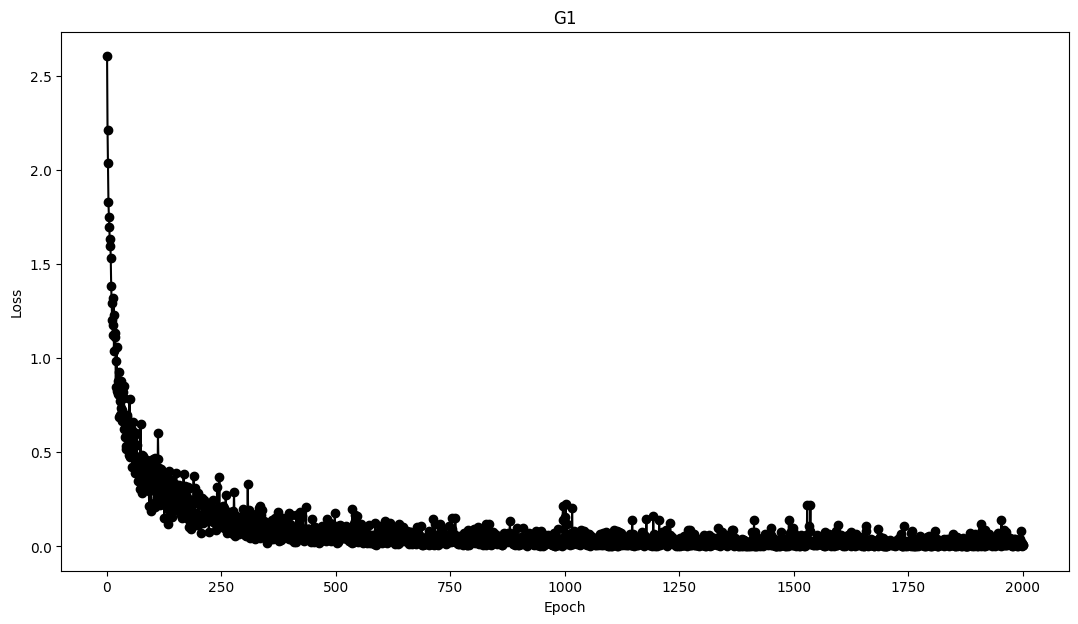

Trainig Time: 95.63034892082214
tersting time: 95.6462082862854
Epoch 0: loss 2.2367509081959724%, 1->1.
Epoch 100: loss 17.74051785469055%, 8->8.
Epoch 200: loss 1.6212640330195427%, 4->4.
Epoch 300: loss 1.0284560732543468%, 8->8.


KeyboardInterrupt: 

In [15]:
tasks = [
    [64, 0.1, 2000],
    [64, 0.15, 2000],
    [64, 0.05, 2000],
    [64, 0.5, 2000],
    [64, 0.01, 2000],
    [128, 0.1, 2000],
    [128, 0.15, 2000],
    [128, 0.05, 2000],
    [128, 0.5, 2000],
    [128, 0.01, 2000],
    [32, 0.1, 2000],
    [32, 0.15, 2000],
    [32, 0.05, 2000],
    [32, 0.5, 2000],
    [32, 0.01, 2000],
    [64, 0.1, 8000],
    [64, 0.15, 8000],
    [64, 0.05, 8000],
    [64, 0.5, 8000],
    [64, 0.01, 8000],
    [128, 0.1, 8000],
    [128, 0.15, 8000],
    [128, 0.05, 8000],
    [128, 0.5, 8000],
    [128, 0.01, 8000],
    [32, 0.1, 8000],
    [32, 0.15, 8000],
    [32, 0.05, 8000],
    [32, 0.5, 8000],
    [32, 0.01, 8000],

    [64, 0.1, 2000],
    [64, 0.15, 2000],
    [64, 0.05, 2000],
    [64, 0.5, 2000],
    [64, 0.01, 2000],
    [128, 0.1, 2000],
    [128, 0.15, 2000],
    [128, 0.05, 2000],
    [128, 0.5, 2000],
    [128, 0.01, 2000],
    [32, 0.1, 2000],
    [32, 0.15, 2000],
    [32, 0.05, 2000],
    [32, 0.5, 2000],
    [32, 0.01, 2000],
    [64, 0.1, 8000],
    [64, 0.15, 8000],
    [64, 0.05, 8000],
    [64, 0.5, 8000],
    [64, 0.01, 8000],
    [128, 0.1, 8000],
    [128, 0.15, 8000],
    [128, 0.05, 8000],
    [128, 0.5, 8000],
    [128, 0.01, 8000],
    [32, 0.1, 8000],
    [32, 0.15, 8000],
    [32, 0.05, 8000],
    [32, 0.5, 8000],
    [32, 0.01, 8000],
]
i = 0
for task in tasks:
    i += 1
    if 1 <= i < 31:
        train(str(task[0]), str(task[1]), str(task[2]), f"G{i}", dataset)
    elif 31 <= i < 61:
        train(str(task[0]), str(task[1]), str(task[2]), f"G{i}", dataset, LeNet5())